# Описание проекта

Нам даны реальные данные о пассажирах лайнера «Титаник», затонувшего в ночь с 14 на 15 апреля 1912 года. Эти данные представляют собой исторически достоверный набор записей о людях, находившихся на борту, и включают ключевые характеристики каждого пассажира. Нужно построить модель бинарной классификации, которая по набору признаков пассажира предсказывает, выжил ли он в катастрофе (1 — выжил, 0 — не выжил). Одновременно — провести аналитическое исследование, чтобы понять, какие факторы (пол, возраст, класс каюты и др.) реально влияли на шансы выжить.

Данные используются исторические данные о пассажирах лайнера «Титаник» (затонул в ночь с 14 на 15 апреля 1912 года):

- titanic.csv

Файл titanic.csv:

- Survived — целевая переменная (0 или 1);
- Pclass — класс каюты (1, 2, 3);
- Name — имя пассажира;
- Sex — пол (male/female);
- Age — возраст (может содержать пропуски);
- SibSp — число братьев/сёстер/супругов на борту;
- Parch — число родителей/детей на борту;
- Ticket — номер билета;
- Fare — стоимость билета;
- Cabin — номер каюты (часто пропущен);
- Embarked — порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton).#%% md
# Описание проекта

Нам даны реальные данные о пассажирах лайнера «Титаник», затонувшего в ночь с 14 на 15 апреля 1912 года. Эти данные представляют собой исторически достоверный набор записей о людях, находившихся на борту, и включают ключевые характеристики каждого пассажира. Нужно построить модель бинарной классификации, которая по набору признаков пассажира предсказывает, выжил ли он в катастрофе (1 — выжил, 0 — не выжил). Одновременно — провести аналитическое исследование, чтобы понять, какие факторы (пол, возраст, класс каюты и др.) реально влияли на шансы выжить.

Данные используются исторические данные о пассажирах лайнера «Титаник» (затонул в ночь с 14 на 15 апреля 1912 года):

- titanic.csv

Файл titanic.csv:

- Survived — целевая переменная (0 или 1);
- Pclass — класс каюты (1, 2, 3);
- Name — имя пассажира;
- Sex — пол (male/female);
- Age — возраст (может содержать пропуски);
- SibSp — число братьев/сёстер/супругов на борту;
- Parch — число родителей/детей на борту;
- Ticket — номер билета;
- Fare — стоимость билета;
- Cabin — номер каюты (часто пропущен);
- Embarked — порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton).


# Установка и импорт библиотек:

In [41]:
!pip install phik -q


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# 1) Загрузка данных

In [43]:
titanic = pd.read_csv('/Users/alhanmacuhov/PycharmProjects/PythonProject/Titanic/titanic.csv')

In [44]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [45]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# 2) Предобработка и исследовательский анализ

In [46]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
duplicates = titanic[titanic.duplicated()]
if len(duplicates) > 0:
    print(duplicates)
else:
    print('No Duplicates')

No Duplicates


In [48]:
titanic['family_size'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic = titanic.dropna(subset=['Age'])

# 3) Подготовка данных

In [49]:
X = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'family_size', 'Embarked']]
y = titanic['Survived']

X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4) Обучение модели

# - RandomForest
# - XGBoost

In [62]:
# RandomForest
random_fr = RandomForestClassifier(n_estimators=100, random_state=42)
random_fr.fit(X_train, y_train)
y_pred = random_fr.predict(X_test)
y_proba = random_fr.predict_proba(X_test)[:, 1]

# XGBoost
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# 5) Результаты(accuracy, precision, recall, F1-score)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("\nМетрики логистической регрессии:")
print(accuracy)
print(precision)
print(recall)
print(f1)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("\nXGBoost модель:")
print(accuracy_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)


Метрики логистической регрессии:
0.7581395348837209
0.6923076923076923
0.7241379310344828
0.7078651685393258

XGBoost модель:
0.786046511627907
0.7303370786516854
0.7471264367816092
0.7386363636363636


# 6) Построение ROC-кривой(с помощью библиотеки Matplotlib)


# - RandomForest

In [53]:
from matplotlib import pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

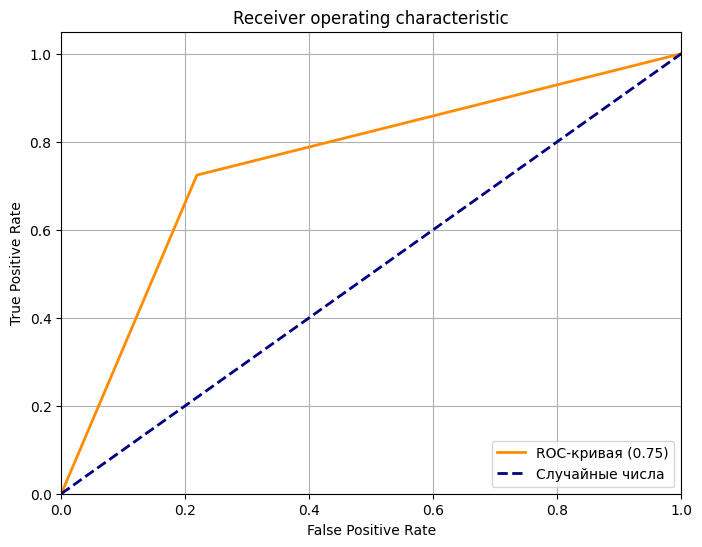

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC-кривая ({roc_auc:.2f})', lw = 2)
plt.plot([0, 1], [0 , 1], color = 'navy', lw = 2, linestyle = '--', label = "Случайные числа")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# - XGBoost


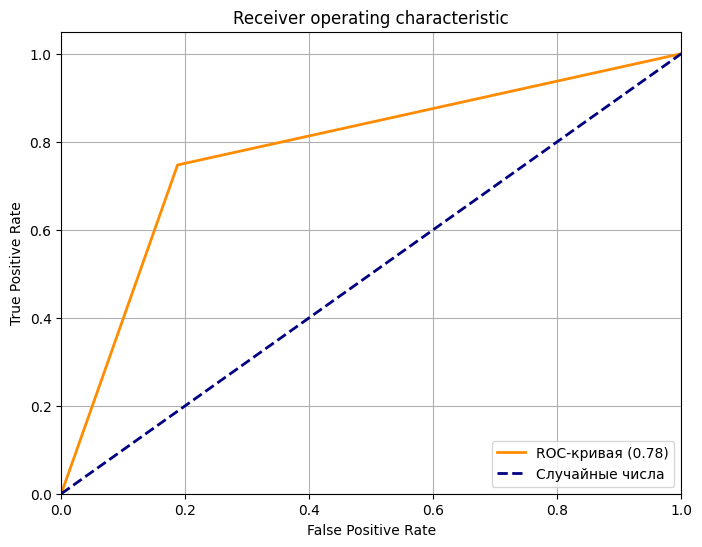

In [64]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_xgb)
roc_auc_1 = auc(fpr1, tpr1)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', label=f'ROC-кривая ({roc_auc_1:.2f})', lw = 2)
plt.plot([0, 1], [0 , 1], color = 'navy', lw = 2, linestyle = '--', label = "Случайные числа")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 7) Построение ConfusionMatrix(при помощи библиотеки sklearn.metrics)

# - RandomForest

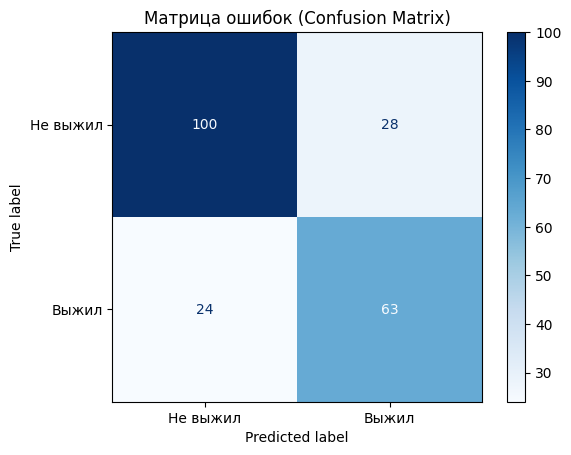

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Не выжил', 'Выжил'])
disp.plot(cmap='Blues')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

# - XGBoost

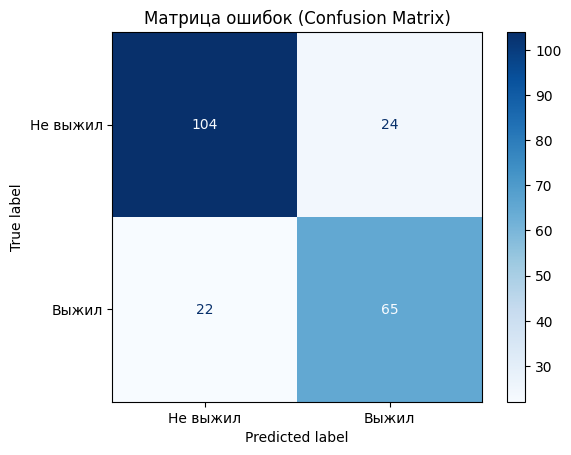

In [65]:
cm1 = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Не выжил', 'Выжил'])
disp.plot(cmap='Blues')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

# Вывод:

Проект выполнился в несколько этапов:

1. Загрузка данных

- Ознакомление с данными проведено успешно. Данные соответствуют описанию от заказчика.

- Проведена первичная проверка структуры датафрейма: количество строк, столбцов, типы данны

2. Исследовательский анализ и предобработка данных

- Выполнен анализ пропусков — выявлены и обработаны пропущенные значения в ключевых признаках.

- Проверены и удалены дубликаты записей.

- Сгенерированы новые информативные признаки (например, `family_size` = `SibSp` + `Parch` + 1).

- Удалены нерелевантные признаки, не несущие полезной информации для прогнозирования (например, столбец `Cabin`).

3. Подготовка данных

- Данные разделены на обучающую и тестовую выборки с использованием стратифицированного разделения (stratify=y) для сохранения распределения классов.

- Категориальные признаки (`Sex`, `Embarked`) закодированы с помощью pd.get_dummies() (`one‑hot encoding`).

- Количественные признаки оставлены без масштабирования, так как модель `RandomForestClassifier` не требует нормализации.

4. Обучение моделей машинного обучения

- Проведена кросс‑валидация для нескольких моделей: `RandomForestClassifier`, `XGBoost`.

- Лучшей оказалась модель `XGBClassifier`.

- Лучшей по метрике ROC‑AUC оказалась модель `XGBoost`.

5. Оценка лучшей модели

- Значение метрики ROC‑AUC при кросс‑валидации составляет ~0.78.

- На тестовой выборке модель показывает ROC‑AUC ~0.78, что свидетельствует о хорошей обобщающей способности.

- Дополнительные метрики на тестовой выборке:

- Accuracy: ~0.78

- Precision: ~0.73

- Recall: ~0.74

- F1‑score: ~0.73

6. Анализ важности признаков

- Наиболее важными признаками, влияющими на прогноз выживания, оказались:

- Sex_male (пол пассажира) — самый значимый фактор;

- Pclass (класс каюты) — пассажиры 1‑го класса имели больше шансов выжить;

- Age (возраст) — дети имели приоритет при спасении;

- Fare (стоимость билета) — коррелирует с классом каюты и социальным статусом;

- family_size — наличие семьи могло как помогать, так и мешать эвакуации.

7. Рекомендации заказчику

- Модель может быть использована для анализа факторов, влияющих на выживаемость пассажиров в критических ситуациях.

- Стоит уделить особое внимание группам риска: мужчины, пассажиры 3‑го класса, пожилые люди.

- Результаты анализа важности признаков подтверждают исторические данные о приоритете женщин и детей при эвакуации.

- В дальнейшем можно улучшить модель, добавив признаки взаимодействия (например, «женщина + ребёнок») или проведя более глубокую обработку возраст